# Importing Libraries

In [1]:
!pip install bert-for-tf2

     |████████████████████████████████| 41 kB 92 kB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-py3-none-any.whl size=30534 sha256=7e0111540d792562e331fb2bfd3f4be7ccf613555cfe90ca30530f9e74ea4784
  Stored in directory: /root/.cache/pip/wheels/47/b6/e5/8c76ec779f54bc5c2f1b57d2200bb9c77616da83873e8acb53
  Created wheel for params-flow: filename=params_flow-0.8.2-py3-none-any.whl size=19473 sha256=07d1f57da73043a878df2148fde1857cf01fb20221eabf073b0a0509c5128197
  Stored in directory: /root/.cache/pip/wheels/0e/fc/d2/a44fff33af0f233d7def6e7de413006d57c10e10ad736fe8f5
  Created wheel for py-params: filename=py_params-0.10.2-py3-none-any.whl size=7912 sha256=1e4689ad2e6c47df9c15103699e7fa76888dd5409a8066f3344e14943ceadca7
  Stored in directory: /root/.cache/pip/wheels/e1/11/67/33cc51bbee127cb8fb2ba549cd29109b2f22da43ddf9969716
Successfully built bert-for-tf2 params-flow py-params


In [2]:
import numpy as np
import math
import re
import pandas as pd
from bs4 import BeautifulSoup
import random
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import bert
import plotly.express as px
from wordcloud import WordCloud

In [3]:
!pip install sentencepiece

#  Analyzing the Data

In [4]:
data = pd.read_csv('../input/stockmarket-sentiment-dataset/stock_data.csv')

In [5]:
data

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,-1
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


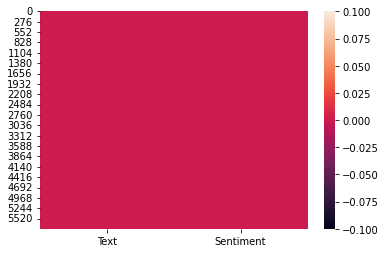

In [6]:
sns.heatmap(data.isnull());

In [7]:
temp = data.describe()
temp.style.background_gradient(cmap='Oranges')

,Sentiment
count,5791.000000
mean,0.272664
std,0.962192
min,-1.000000
25%,-1.000000
50%,1.000000
75%,1.000000
max,1.000000


(0.0, 4053.5000000000005)

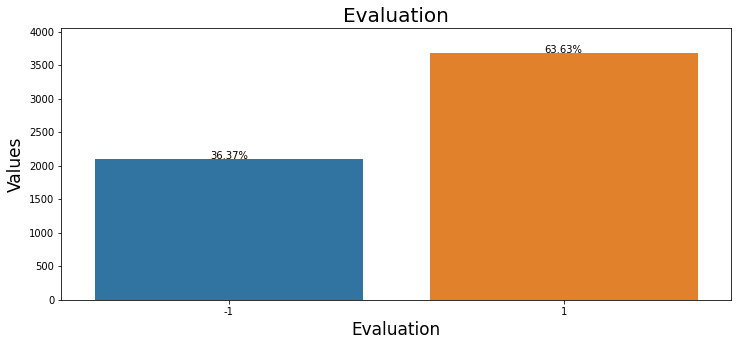

In [8]:
total = len(data)
ax1 = plt.figure(figsize=(12,5))

g = sns.countplot(x='Sentiment', data=data)
g.set_title("Evaluation", fontsize=20)
g.set_xlabel("Evaluation", fontsize=17)
g.set_ylabel("Values", fontsize=17)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=10) 
g.set_ylim(0, max(sizes) * 1.1)

In [9]:
fig2 = px.histogram(data,x='Sentiment',color='Sentiment',template='plotly_dark')
fig2.show()

In [10]:
positive = data[data['Sentiment'] == 1 ]
negative = data[data['Sentiment'] == -1]

In [11]:
data

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,-1
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


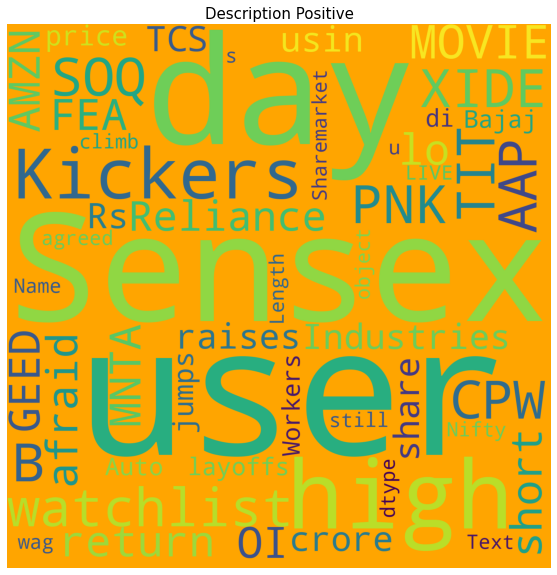

In [12]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fast')
wc = WordCloud(background_color = 'orange', width = 1500, height = 1500).generate(str(positive['Text']))
plt.title('Description Positive', fontsize = 15)
plt.imshow(wc)
plt.axis('off')
plt.show()

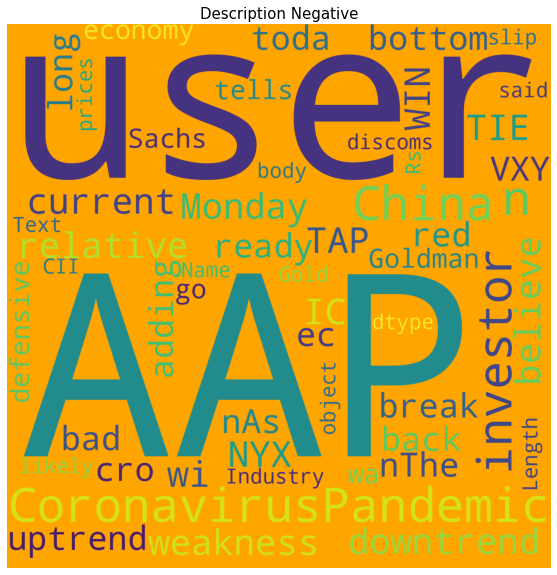

In [13]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fast')
wc = WordCloud(background_color = 'orange', width = 1500, height = 1500).generate(str(negative['Text']))
plt.title('Description Negative', fontsize = 15)
plt.imshow(wc)
plt.axis('off')
plt.show()

# Cleaning the Texts

In [14]:
def clean_tweet(tweet):
  tweet = BeautifulSoup(tweet, 'lxml').get_text()
  tweet = re.sub(r"@[A-Za-z0-9]+", ' ', tweet)
  tweet = re.sub(r"https?://[A-Za-z0-9./]+", ' ', tweet)
  tweet = re.sub(r"[^a-zA-Z.!?']", ' ', tweet)
  tweet = re.sub(r" +", ' ', tweet)
  return tweet

In [15]:
test = '99 ' + data.Text[0]
test

'99 Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ  trade method 1 or method 2, see prev posts'

In [16]:
result = clean_tweet(test)
result

' Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ trade method or method see prev posts'

In [17]:
data_clean = [clean_tweet(tweet) for tweet in data.Text]

In [18]:
data_clean[0:4]

['Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ trade method or method see prev posts',
 'user AAP MOVIE. return for the FEA GEED indicator just trades for the year. AWESOME. ',
 "user I'd be afraid to short AMZN they are looking like a near monopoly in eBooks and infrastructure as a service",
 'MNTA Over . ']

In [19]:
data_labels = data.Sentiment.values
data_labels

array([1, 1, 1, ..., 1, 1, 1])

# Tokenization

In [20]:
FullTokenizer = bert.bert_tokenization.FullTokenizer
bert_layer = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/1', trainable=False)  
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = FullTokenizer(vocab_file, do_lower_case)


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN='hyper,hyper'
   KMP_REDUCTION_BARRIER='1,1'
  

In [21]:
vocab_file

b'/tmp/tfhub_modules/88ac13afec2955fd14396e4582c251841b67429a/assets/vocab.txt'

In [22]:
len(tokenizer.vocab)

30522

In [23]:
def encode_sentence(sent):
  return tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sent))

In [24]:
data_inputs = [encode_sentence(sentence) for sentence in data_clean]

# Database Creation

In [25]:
data_with_len = [[sent, data_labels[i], len(sent)]
                 for i, sent in enumerate(data_inputs)]

In [26]:
random.shuffle(data_with_len)
data_with_len.sort(key=lambda x: x[2])
sorted_all = [(sent_lab[0], sent_lab[1])
              for sent_lab in data_with_len if sent_lab[2] > 7]

In [27]:
all_dataset = tf.data.Dataset.from_generator(lambda: sorted_all,
                                             output_types = (tf.int32, tf.int32))

In [28]:
next(iter(all_dataset))

2021-11-17 01:53:43.979368: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


(<tf.Tensor: shape=(8,), dtype=int32, numpy=array([9779, 2361, 2635, 2062, 2125, 2182, 2105, 1012], dtype=int32)>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>)

In [29]:
BATCH_SIZE = 32
all_batched = all_dataset.padded_batch(BATCH_SIZE, padded_shapes=((None, ), ()))

In [30]:
next(iter(all_batched))

(<tf.Tensor: shape=(32, 8), dtype=int32, numpy=
 array([[ 9779,  2361,  2635,  2062,  2125,  2182,  2105,  1012],
        [ 1037, 10139,  1053,  6515,  5356,  4834,  4332,  4997],
        [12533,  2644,  1999,  9706,  2080,  2000,  1012,  1012],
        [ 1038, 15088,  2078,  1012,  9932,  9932,  9932,  1012],
        [ 9779,  2361,  3201,  1012,  1012,  1012,  1039,  1012],
        [ 1039,  2502,  3769,  8670,  2278,  2000,  3582,   999],
        [ 4855,  3256,  2460,  4638,  2041,  2026,  2678,  4106],
        [29347,  2290, 11498, 18647,  1012,  1012,  1012,  1012],
        [ 9779,  2361,  2454,  6661,  3835,   999,   999,   999],
        [21677,  2232,  2502,  2693,  2651,  1012,  2012,  5012],
        [ 2011,  2094,  3048,  2039,  2006,  2502,  2091,  2154],
        [ 4748,  2213,  2833, 11024, 13196, 12240, 25129,   999],
        [25430,  6199,  3666,  2005,  1037,  2693,  2058,  1012],
        [ 9932,  2290,  2265,  2149,  2242,   999,   999,   999],
        [ 4642,  2290, 13605

In [31]:
len(sorted_all)

5090

In [32]:
NB_BATCHES = len(sorted_all) // BATCH_SIZE
NB_BATCHES

159

In [33]:
NB_BATCHES_TEST = NB_BATCHES // 10
NB_BATCHES_TEST

15

In [34]:
all_batched.shuffle(NB_BATCHES)
test_dataset = all_batched.take(NB_BATCHES_TEST)
train_dataset = all_batched.skip(NB_BATCHES_TEST)

In [35]:
next(iter(test_dataset))

(<tf.Tensor: shape=(32, 8), dtype=int32, numpy=
 array([[ 9779,  2361,  2635,  2062,  2125,  2182,  2105,  1012],
        [ 1037, 10139,  1053,  6515,  5356,  4834,  4332,  4997],
        [12533,  2644,  1999,  9706,  2080,  2000,  1012,  1012],
        [ 1038, 15088,  2078,  1012,  9932,  9932,  9932,  1012],
        [ 9779,  2361,  3201,  1012,  1012,  1012,  1039,  1012],
        [ 1039,  2502,  3769,  8670,  2278,  2000,  3582,   999],
        [ 4855,  3256,  2460,  4638,  2041,  2026,  2678,  4106],
        [29347,  2290, 11498, 18647,  1012,  1012,  1012,  1012],
        [ 9779,  2361,  2454,  6661,  3835,   999,   999,   999],
        [21677,  2232,  2502,  2693,  2651,  1012,  2012,  5012],
        [ 2011,  2094,  3048,  2039,  2006,  2502,  2091,  2154],
        [ 4748,  2213,  2833, 11024, 13196, 12240, 25129,   999],
        [25430,  6199,  3666,  2005,  1037,  2693,  2058,  1012],
        [ 9932,  2290,  2265,  2149,  2242,   999,   999,   999],
        [ 4642,  2290, 13605

In [36]:
next(iter(train_dataset))

(<tf.Tensor: shape=(32, 10), dtype=int32, numpy=
 array([[17324,  2243,  2559,  2005,  1996, 25129,  4443,  1012,  2644,
          1012],
        [ 9686,  8645,  2598, 27589,  2733,  4353,  2012, 26836,  1012,
          1012],
        [ 5310,  2011,  2203,  1997,  1059,  2243, 10047,  6806,  9779,
          2361],
        [21541,  2368,  2065, 27937,  7821,  1012,  2009,  2097,  2175,
          1012],
        [ 9779,  2361,  2023,  2157,  2182,  2003,  2339,  1045,  5223,
          6762],
        [25430,  2100,  1997, 14257,  2460,  1998,  4911,  2041, 15068,
          2818],
        [ 8292,  2063,  8117,  1051,  7172,  3835,  9495,  2220,  2006,
          2572],
        [ 1043,  2860,  9781,  2075,  2275,  2000, 12636,  2013,  3204,
          2918],
        [ 8040,  2232,  2860,  2057,  2794,  2062,  2000,  1996,  2146,
          2651],
        [ 2358,  2072,  8117,  1998,  8117,  3098,  2846,  2794,  4455,
          1012],
        [ 1042,  1037,  2485,  2058,  1012,  2006,  3872,  34

# Model Building

In [37]:
class DCNN(tf.keras.Model):

  def __init__(self,
               vocab_size,
               emb_dim=128,
               nb_filters = 50,
               FFN_units=512,
               nb_classes=2,
               dropout_rate=0.1,
               training=False,
               name="dcnn"):
    super(DCNN, self).__init__(name=name)

    self.embedding = layers.Embedding(vocab_size, emb_dim)

    self.bigram = layers.Conv1D(filters = nb_filters,
                                kernel_size = 2,
                                padding='valid',
                                activation='relu')
    self.trigram = layers.Conv1D(filters = nb_filters,
                                kernel_size = 3,
                                padding='valid',
                                activation='relu')
    self.fourgram = layers.Conv1D(filters = nb_filters,
                                kernel_size = 4,
                                padding='valid',
                                activation='relu')
    
    self.pool = layers.GlobalMaxPool1D()

    self.dense_1 = layers.Dense(units = FFN_units, activation='relu')
    self.dropout = layers.Dropout(rate=dropout_rate)
    if nb_classes == 2:
      self.last_dense = layers.Dense(units=1, activation='sigmoid')
    else:
      self.last_dense = layers.Dense(units=nb_classes, activation='softmax')

  def call(self, inputs, training):
    x = self.embedding(inputs)
    x_1 = self.bigram(x)
    x_1 = self.pool(x_1)
    x_2 = self.trigram(x)
    x_2 = self.pool(x_2)
    x_3 = self.fourgram(x)
    x_3 = self.pool(x_3)

    merged = tf.concat([x_1, x_2, x_3], axis = -1)
    merged = self.dense_1(merged)
    merged = self.dropout(merged, training)
    output = self.last_dense(merged)

    return output

# Training

In [38]:
VOCAB_SIZE = len(tokenizer.vocab)
EMB_DIM = 200
NB_FILTERS = 100
FFN_UNITS = 256
NB_CLASSES = 2
DROPOUT_RATE = 0.2
NB_EPOCHS = 4

In [39]:
Dcnn = DCNN(vocab_size=VOCAB_SIZE,
            emb_dim=EMB_DIM,
            nb_filters = NB_FILTERS,
            FFN_units = FFN_UNITS,
            nb_classes = NB_CLASSES,
            dropout_rate = DROPOUT_RATE)

In [40]:
if NB_CLASSES == 2:
  Dcnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
else:
  Dcnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

In [41]:
history = Dcnn.fit(train_dataset,
                   epochs=NB_EPOCHS)                

Epoch 1/4
145/145 [==============================] - 11s 63ms/step - loss: -4.3161 - accuracy: 0.1544
Epoch 2/4
145/145 [==============================] - 8s 55ms/step - loss: -1676.6102 - accuracy: 0.3148
Epoch 3/4
145/145 [==============================] - 8s 55ms/step - loss: -28611.0645 - accuracy: 0.3438
Epoch 4/4
145/145 [==============================] - 8s 56ms/step - loss: -159723.7656 - accuracy: 0.3534


# Evaluation

In [42]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

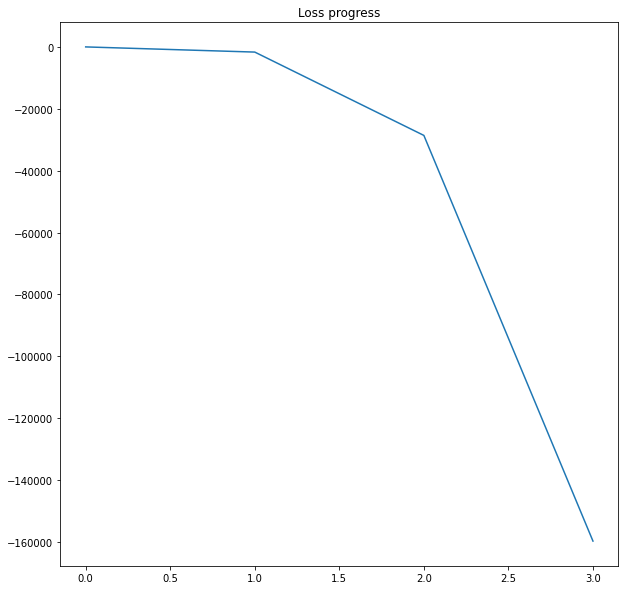

In [43]:
plt.plot(history.history['loss'])
plt.title('Loss progress');

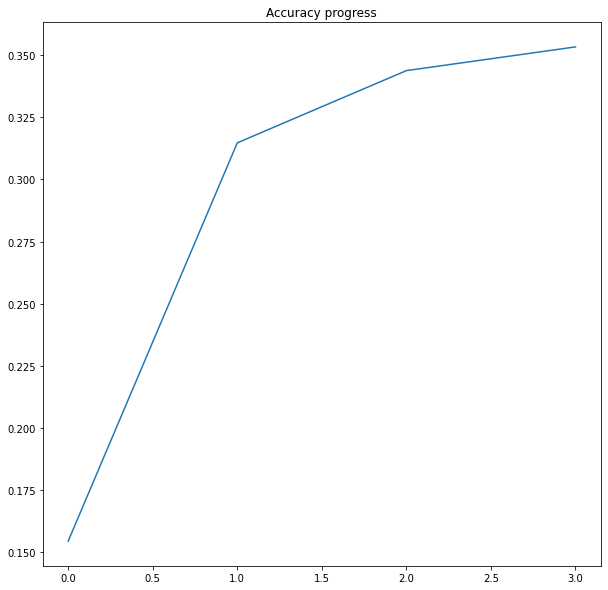

In [44]:
plt.plot(history.history['accuracy'])
plt.title('Accuracy progress');

In [45]:
results = Dcnn.evaluate(test_dataset)
print(results)

15/15 [==============================] - 0s 11ms/step - loss: -206696.4844 - accuracy: 0.4271
[-206696.484375, 0.4270833432674408]


In [46]:
def get_prediction(sentence):
  tokens = encode_sentence(sentence)
  inputs = tf.expand_dims(tokens, 0) 

  output = Dcnn(inputs, training=False)

  sentiment = math.floor(output*2)

  if sentiment == 0:
    print('negative')
  elif sentiment == 1:
    print('positive')

In [47]:
get_prediction(" not do that again")

negative


In [48]:
get_prediction('This a big problem')

negative


It is a well treated database, however small, unfortunately the algorithm did not adapt very well to this database.

Thanks!

# If you find this notebook useful, support with an upvote 👍